In [ ]:
#!pip install keras-visualizer --upgrade


In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.losses import CategoricalCrossentropy
from keras_visualizer import visualizer


# Hyperparameters

from keras.initializers import HeNormal
from keras.layers import BatchNormalization, Dropout


from keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

Y - data :  5


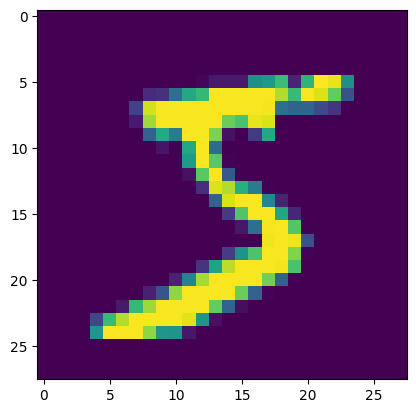

In [ ]:
plt.imshow(x_train[0])
print("Y - data : ",y_train[0])

Y - data :  0


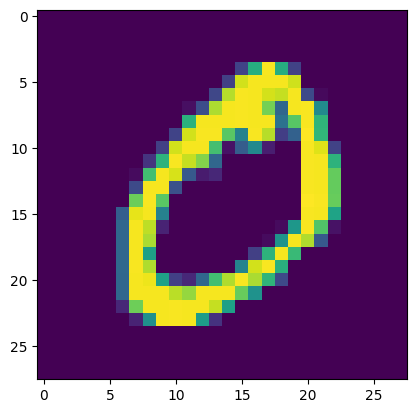

Y - data :  4


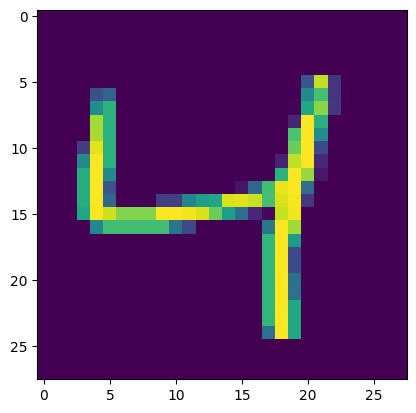

Y - data :  1


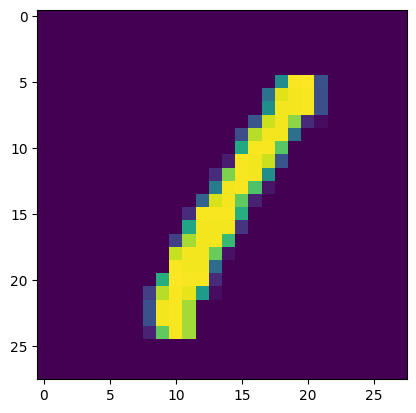

Y - data :  9


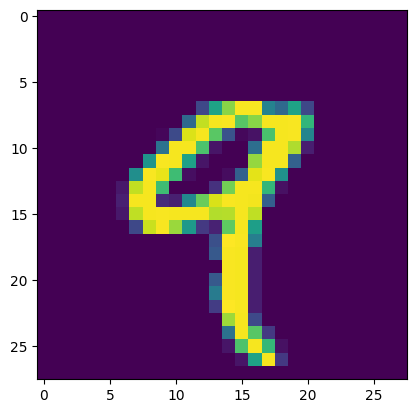

In [ ]:
for i in range(1,5):
  plt.imshow(x_train[i],)
  print("Y - data : ",y_train[i])
  plt.show()

Y - data :  2


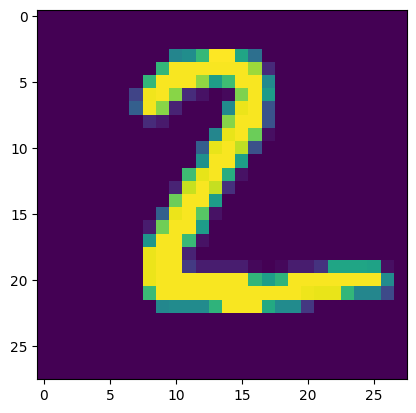

Y - data :  1


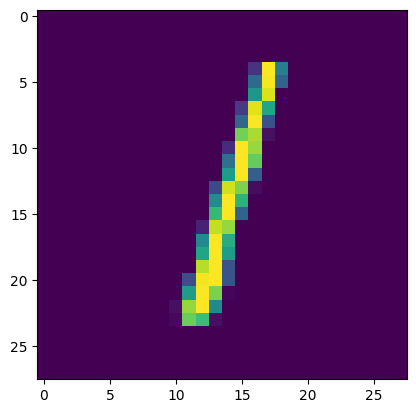

Y - data :  0


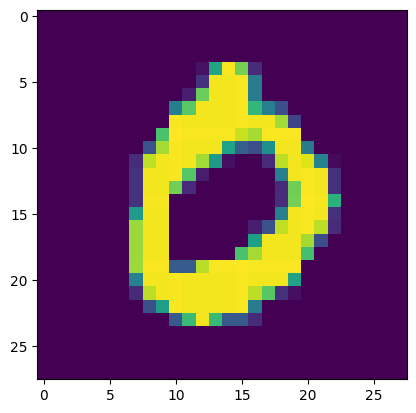

Y - data :  4


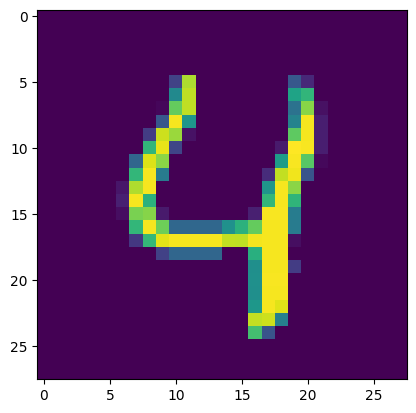

In [ ]:
for i in range(1,5):
  plt.imshow(x_test[i])
  print("Y - data : ",y_test[i])
  plt.show()

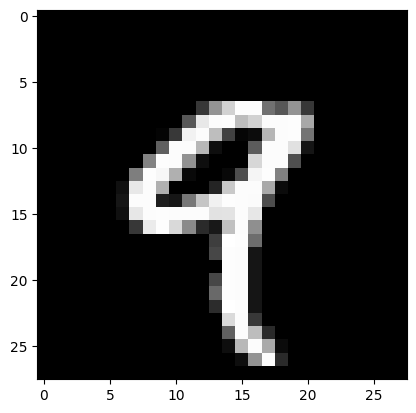

In [ ]:
plt.imshow(x_train[i],cmap='gray')

In [ ]:
x_train[i]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55,
        148, 210, 253, 253, 113,  87, 148,  55,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 232,
        252, 253, 189, 210, 252, 252, 253, 168,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  57, 242, 252,
        190,  65,   5,  12, 182, 252, 253, 116,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 252, 252, 183,
         14,   0,   0,  92, 252, 252, 225,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 132, 253, 252, 146,  14,
          0,   0,   0, 215, 252, 252,  79,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126, 253, 247, 176,   9,   0,
          0,   8,  78, 245, 253, 129,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 232, 252, 176,   0,   0,   0,
         36, 201, 252, 252, 169,  11,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  22, 252, 252,  30,  22, 119, 197,
        241, 253, 252, 251,  77,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 231, 252, 253, 252, 252, 252,
        226, 227, 252, 231,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  55, 235, 253, 217, 138,  42,
         24, 192, 252, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62, 255, 253, 109,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         71, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         71, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        106, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         45, 255, 253,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 218, 252,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
28*28

784

In [ ]:
#x_train.reshape(60000,784)

In [ ]:
x_train.shape[0]

60000

In [ ]:
x_train.shape[1]

28

In [ ]:
x_train.shape[2]

28

In [ ]:
x_train.shape[1]*x_train.shape[2]

784

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])

In [ ]:
X_train_scale = scaler.fit_transform(X_train)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [ ]:
X_test_scale = scaler.transform(X_test)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train[0]

np.uint8(5)

In [ ]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [ ]:
Y_train.shape

(60000, 10)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
Y_test.shape

(10000, 10)

#Model

In [ ]:
model  = Sequential()
#Hidden Layer 1
model.add(Dense(10, input_shape=(X_train.shape[1],), activation = 'sigmoid'))
#Hidden Layer 2
model.add(Dense(10, activation = 'sigmoid'))
#Hidden Layer 3
model.add(Dense(10, activation = 'sigmoid'))
#Output Layer
model.add(Dense(Y_train.shape[1], activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
sgd_optimizer = SGD()
categorical_loss = CategoricalCrossentropy()

In [ ]:
model.compile(optimizer = sgd_optimizer, loss = categorical_loss, metrics = ['accuracy'])

In [ ]:
# 6,40,000.  -
# 7,85,110
# 8,180.  (3)
# 1,00,233
# 11,010
# 1,00,010
# 834
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,180 (31.95 KB)

 Trainable params: 8,180 (31.95 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
visualizer(model, file_name='graph_image_classification', file_format='png', view=False, settings=None)

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=10, validation_data=(X_test, Y_test) ,verbose=1)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.1521 - loss: 2.2874 - val_accuracy: 0.2927 - val_loss: 2.1134
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.3211 - loss: 1.9793 - val_accuracy: 0.5260 - val_loss: 1.6369
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5063 - loss: 1.5560 - val_accuracy: 0.5597 - val_loss: 1.3765
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.5651 - loss: 1.3751 - val_accuracy: 0.6552 - val_loss: 1.2310
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.6032 - loss: 1.2636 - val_accuracy: 0.6855 - val_loss: 1.1502
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.5931 - loss: 1.2535 - val_accuracy: 0.6680 - val_loss: 1.1887
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6270 - loss: 1.2063 - val_accuracy: 0.6241 - val_loss: 1.2177
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.6359 - loss: 1

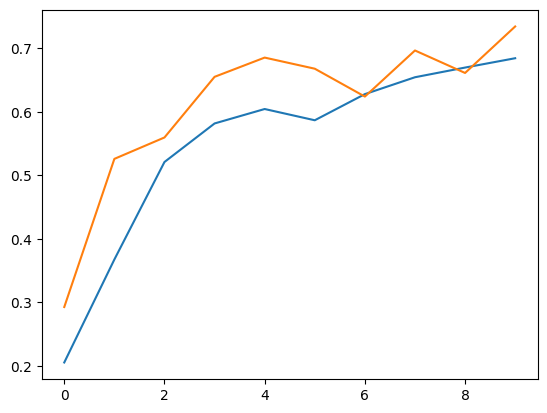

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
#scsaled input
history = model.fit(X_train_scale, Y_train, epochs=10, batch_size=10, validation_data=(X_test_scale, Y_test) ,verbose=1)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.1233 - loss: 2.3139 - val_accuracy: 0.1428 - val_loss: 2.2632
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.2232 - loss: 2.2143 - val_accuracy: 0.3099 - val_loss: 1.9136
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.3352 - loss: 1.8081 - val_accuracy: 0.4209 - val_loss: 1.4644
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.4452 - loss: 1.4082 - val_accuracy: 0.5942 - val_loss: 1.2510
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5853 - loss: 1.2092 - val_accuracy: 0.6932 - val_loss: 1.0518
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7134 - loss: 1.0203 - val_accuracy: 0.7898 - val_loss: 0.8938
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8008 - loss: 0.8694 - val_accuracy: 0.8352 - val_loss: 0.7643
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8420 - loss: 0

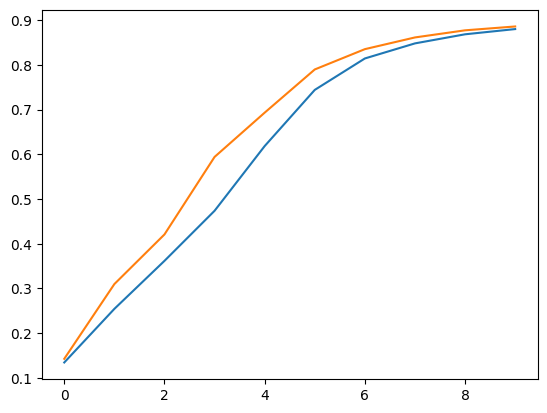

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model.evaluate(X_train_scale, Y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8868 - loss: 0.4857


[0.4843873679637909, 0.885366678237915]

In [ ]:
model.evaluate(X_test_scale, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8744 - loss: 0.5296


[0.49102354049682617, 0.8859000205993652]

In [ ]:
model.predict(X_test_scale)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.18511206e-06, 8.58524535e-03, 9.07004505e-06, ...,
        9.20322299e-01, 1.27886608e-02, 5.11679649e-02],
       [1.72720298e-01, 5.87294453e-05, 7.33122647e-01, ...,
        3.37323831e-06, 5.49582206e-03, 1.45707572e-05],
       [2.11966267e-07, 9.17849183e-01, 5.19964669e-04, ...,
        2.59771198e-02, 2.59440057e-02, 6.94842718e-04],
       ...,
       [1.91100512e-03, 1.81213511e-06, 7.07374420e-04, ...,
        5.35560132e-04, 5.49123483e-03, 8.71367455e-02],
       [5.66290459e-04, 7.65705947e-03, 1.23040350e-02, ...,
        4.82614376e-02, 6.62615597e-01, 1.09511875e-01],
       [1.06149748e-01, 5.92218008e-08, 1.15273213e-02, ...,
        2.28602994e-06, 7.02682359e-04, 5.73618221e-04]], dtype=float32)

In [ ]:
import numpy as np
np.argmax(model.predict(X_test_scale), axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 8, 6])

In [ ]:
# Proper Initialization of Weights
initializer = HeNormal()

In [ ]:
model  = Sequential()
#Hidden Layer 1
model.add(Dense(10, input_shape=(X_train.shape[1],), kernel_initializer = initializer, activation = 'sigmoid'))
#Hidden Layer 2
model.add(Dense(10, kernel_initializer = initializer, activation = 'sigmoid'))
#Hidden Layer 3
model.add(Dense(10, kernel_initializer = initializer, activation = 'sigmoid'))
#Output Layer
model.add(Dense(Y_train.shape[1], kernel_initializer = initializer, activation = 'softmax'))


sgd_optimizer = SGD()
categorical_loss = CategoricalCrossentropy()

model.compile(optimizer = sgd_optimizer, loss = categorical_loss, metrics = ['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size=10, validation_data=(X_test, Y_test) ,verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6000/6000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.2468 - loss: 2.2065 - val_accuracy: 0.4908 - val_loss: 1.7495
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.4825 - loss: 1.6761 - val_accuracy: 0.4981 - val_loss: 1.5319
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.5143 - loss: 1.4494 - val_accuracy: 0.5366 - val_loss: 1.3350
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5534 - loss: 1.3022 - val_accuracy: 0.5441 - val_loss: 1.3219
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5554 - loss: 1.2928 - val_accuracy: 0.5814 - val_loss: 1.1701
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6181 - loss: 1.1595 - val_accuracy: 0.6824 - val_loss: 1.0307
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.6828 - loss: 1.0332 - val_accuracy: 0.6616 - val_loss: 1.0592
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.6625 - loss: 1.0435 - val

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7508 - loss: 0.8462
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7470 - loss: 0.8548
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 3, 1, ..., 9, 5, 6])

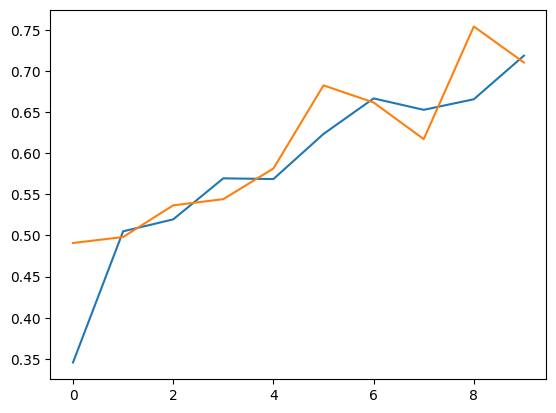

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

model.evaluate(X_train_scale, Y_train)
model.evaluate(X_test_scale, Y_test)

np.argmax(model.predict(X_test_scale), axis = 1)

In [ ]:
# Non Saturating Activation Function

In [ ]:
model  = Sequential()
#Hidden Layer 1
model.add(Dense(10, input_shape=(X_train.shape[1],), activation = 'elu'))
#Hidden Layer 2
model.add(Dense(10, activation = 'elu'))
#Hidden Layer 3
model.add(Dense(10, activation = 'elu'))
#Output Layer
model.add(Dense(Y_train.shape[1], activation = 'softmax'))


sgd_optimizer = SGD()
categorical_loss = CategoricalCrossentropy()

model.compile(optimizer = sgd_optimizer, loss = categorical_loss, metrics = ['accuracy'])

history = model.fit(X_train_scale, Y_train, epochs=100, batch_size=1000, validation_data=(X_test_scale, Y_test) ,verbose=1)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1751 - loss: 2.2794 - val_accuracy: 0.3106 - val_loss: 2.0970
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3326 - loss: 2.0498 - val_accuracy: 0.3959 - val_loss: 1.8973
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4096 - loss: 1.8559 - val_accuracy: 0.4372 - val_loss: 1.7264
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4462 - loss: 1.6949 - val_accuracy: 0.4796 - val_loss: 1.5765
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4936 - loss: 1.5477 - val_accuracy: 0.5432 - val_loss: 1.4421
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5538 - loss: 1.4170 - val_accuracy: 0.6015 - val_loss: 1.3215
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6099 - loss: 1.2991 - val_accuracy: 0.6444 - val_loss: 1.2137
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6530 - loss: 1.1945 - val_accuracy: 0.6832 - 

In [ ]:
import numpy as np

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9063 - loss: 0.3256
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8932 - loss: 0.3662
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

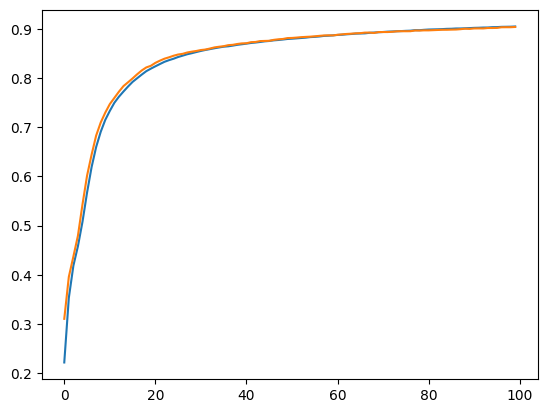

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

model.evaluate(X_train_scale, Y_train)
model.evaluate(X_test_scale, Y_test)

np.argmax(model.predict(X_test_scale), axis = 1)

In [ ]:
# Better Optimizers

In [ ]:
model  = Sequential()
#Hidden Layer 1
model.add(Dense(10, input_shape=(X_train.shape[1],), activation = 'sigmoid'))
#Hidden Layer 2
model.add(Dense(10, activation = 'sigmoid'))
#Hidden Layer 3
model.add(Dense(10, activation = 'sigmoid'))
#Output Layer
model.add(Dense(Y_train.shape[1], activation = 'softmax'))


adam_optimizer = Adam()
categorical_loss = CategoricalCrossentropy()

model.compile(optimizer = adam_optimizer, loss = categorical_loss, metrics = ['accuracy'])

history = model.fit(X_train_scale, Y_train, epochs=10, batch_size=100, validation_data=(X_test_scale, Y_test) ,verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1394 - loss: 2.3248 - val_accuracy: 0.3725 - val_loss: 1.8646
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4263 - loss: 1.7164 - val_accuracy: 0.5753 - val_loss: 1.3478
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5786 - loss: 1.2787 - val_accuracy: 0.6591 - val_loss: 1.0759
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6902 - loss: 1.0142 - val_accuracy: 0.7476 - val_loss: 0.8566
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7600 - loss: 0.8149 - val_accuracy: 0.7819 - val_loss: 0.7172
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8045 - loss: 0.6809 - val_accuracy: 0.8159 - val_loss: 0.6270
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8397 - loss: 0.5892 - val_accuracy: 0.8498 - val_loss: 0.5560
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8615 - loss: 0.5270 - val_accuracy: 0.

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8951 - loss: 0.3981
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8727 - loss: 0.4657
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

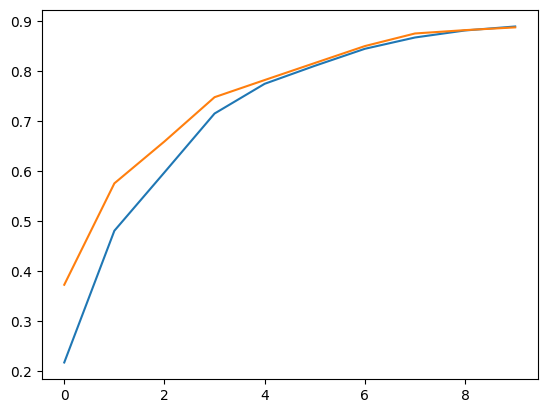

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

model.evaluate(X_train_scale, Y_train)
model.evaluate(X_test_scale, Y_test)

np.argmax(model.predict(X_test_scale), axis = 1)

In [ ]:
# Batch Normalization

In [ ]:
model  = Sequential()
#Hidden Layer 1
model.add(Dense(10, input_shape=(X_train.shape[1],), activation = 'sigmoid'))
model.add(BatchNormalization())
#Hidden Layer 2
model.add(Dense(10, activation = 'sigmoid'))
model.add(BatchNormalization())
#Hidden Layer 3
model.add(Dense(10, activation = 'sigmoid'))
model.add(BatchNormalization())
#Output Layer
model.add(Dense(Y_train.shape[1], activation = 'softmax'))


sgd_optimizer = SGD()
categorical_loss = CategoricalCrossentropy()

model.compile(optimizer = sgd_optimizer, loss = categorical_loss, metrics = ['accuracy'])

history = model.fit(X_train_scale, Y_train, epochs=10, batch_size=100, validation_data=(X_test_scale, Y_test) ,verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6210 - loss: 1.2820 - val_accuracy: 0.8674 - val_loss: 0.5828
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8603 - loss: 0.5397 - val_accuracy: 0.8888 - val_loss: 0.4198
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8842 - loss: 0.4350 - val_accuracy: 0.8983 - val_loss: 0.3686
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8910 - loss: 0.3928 - val_accuracy: 0.9067 - val_loss: 0.3388
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8968 - loss: 0.3694 - val_accuracy: 0.9096 - val_loss: 0.3216
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9013 - loss: 0.3444 - val_accuracy: 0.9156 - val_loss: 0.3047
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9077 - loss: 0.3206 - val_accuracy: 0.9185 - val_loss: 0.2886
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9123 - loss: 0.3067 - val_accuracy: 0.

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9267 - loss: 0.2550
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9141 - loss: 0.2952
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

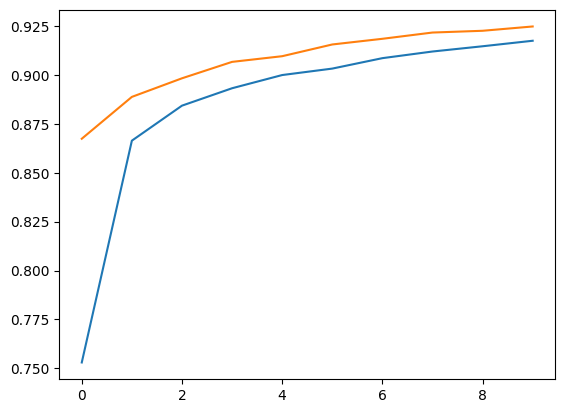

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

model.evaluate(X_train_scale, Y_train)
model.evaluate(X_test_scale, Y_test)

np.argmax(model.predict(X_test_scale), axis = 1)

In [ ]:
# DropOut

In [ ]:
model  = Sequential()
#Hidden Layer 1
model.add(Dense(10, input_shape=(X_train.shape[1],), activation = 'elu'))
model.add(Dropout(0.5))
#Hidden Layer 2
model.add(Dense(10, activation = 'elu'))
model.add(Dropout(0.5))
#Hidden Layer 3
model.add(Dense(10, activation = 'elu'))
model.add(Dropout(0.5))
#Output Layer
model.add(Dense(Y_train.shape[1], activation = 'softmax'))


sgd_optimizer = SGD()
categorical_loss = CategoricalCrossentropy()

model.compile(optimizer = sgd_optimizer, loss = categorical_loss, metrics = ['accuracy'])

history = model.fit(X_train_scale, Y_train, epochs=100, batch_size=100, validation_data=(X_test_scale, Y_test) ,verbose=1)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1641 - loss: 2.2586 - val_accuracy: 0.6329 - val_loss: 1.7258
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2628 - loss: 1.9885 - val_accuracy: 0.6503 - val_loss: 1.4780
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3096 - loss: 1.8588 - val_accuracy: 0.6902 - val_loss: 1.3155
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3451 - loss: 1.7588 - val_accuracy: 0.7141 - val_loss: 1.1929
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3652 - loss: 1.6877 - val_accuracy: 0.7136 - val_loss: 1.1204
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3847 - loss: 1.6399 - val_accuracy: 0.7136 - val_loss: 1.0693
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3879 - loss: 1.6124 - val_accuracy: 0.7006 - val_loss: 1.0381
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4007 - loss: 1.5788 - val_accu

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7481 - loss: 0.7266
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7312 - loss: 0.7723
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

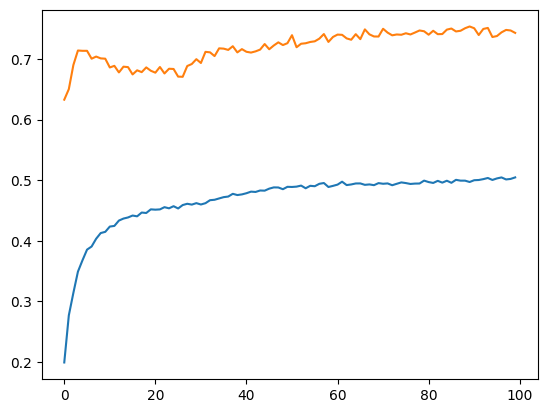

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

model.evaluate(X_train_scale, Y_train)
model.evaluate(X_test_scale, Y_test)

np.argmax(model.predict(X_test_scale), axis = 1)

In [ ]:
#Put Everything in one place

initializer = HeNormal()

In [ ]:
model  = Sequential()
#Hidden Layer 1
model.add(Dense(10, input_shape=(X_train.shape[1],), kernel_initializer = initializer,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#Hidden Layer 2
model.add(Dense(10, kernel_initializer = initializer, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#Hidden Layer 3
model.add(Dense(10, kernel_initializer = initializer, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#Output Layer
model.add(Dense(Y_train.shape[1], kernel_initializer = initializer, activation = 'softmax'))


adam_optimizer = Adam()
categorical_loss = CategoricalCrossentropy()

model.compile(optimizer = adam_optimizer, loss = categorical_loss, metrics = ['accuracy', 'f1_score'])

history = model.fit(X_train_scale, Y_train, epochs=100, batch_size=100, validation_data=(X_test_scale, Y_test) ,verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3737 - f1_score: 0.3594 - loss: 1.8518 - val_accuracy: 0.8108 - val_f1_score: 0.7937 - val_loss: 0.7131
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6436 - f1_score: 0.6359 - loss: 1.0504 - val_accuracy: 0.8756 - val_f1_score: 0.8727 - val_loss: 0.4823
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7119 - f1_score: 0.7083 - loss: 0.8737 - val_accuracy: 0.8850 - val_f1_score: 0.8817 - val_loss: 0.4290
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7438 - f1_score: 0.7410 - loss: 0.7947 - val_accuracy: 0.8921 - val_f1_score: 0.8894 - val_loss: 0.3909
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7558 - f1_score: 0.7530 - loss: 0.7622 - val_accuracy: 0.8995 - val_f1_score: 0.8971 - val_loss: 0.3626
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7609 - f1_score: 0.7585 - loss: 0.7366 - val_accuracy: 0.8981 - val_f1_score: 

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9313 - f1_score: 0.9299 - loss: 0.2436
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9111 - f1_score: 0.9090 - loss: 0.3256
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

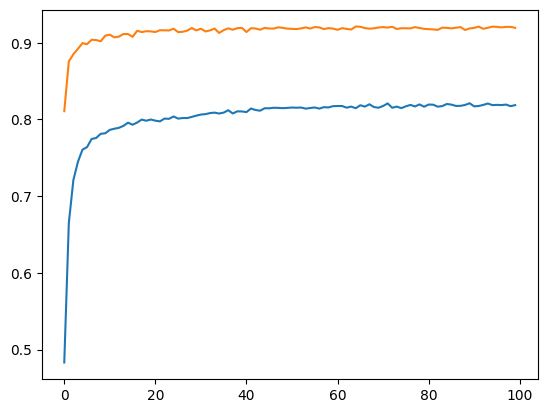

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

model.evaluate(X_train_scale, Y_train)
model.evaluate(X_test_scale, Y_test)

np.argmax(model.predict(X_test_scale), axis = 1)

In [ ]:
model  = Sequential()
#Hidden Layer 1
model.add(Dense(10, input_shape=(X_train.shape[1],), kernel_initializer = initializer,activation = 'relu'))
model.add(BatchNormalization())
#Hidden Layer 2
model.add(Dense(10, kernel_initializer = initializer, activation = 'relu'))
model.add(BatchNormalization())
#Hidden Layer 3
model.add(Dense(10, kernel_initializer = initializer, activation = 'relu'))
model.add(BatchNormalization())
#Output Layer
model.add(Dense(Y_train.shape[1], kernel_initializer = initializer, activation = 'softmax'))


adam_optimizer = Adam()
categorical_loss = CategoricalCrossentropy()

model.compile(optimizer = adam_optimizer, loss = categorical_loss, metrics = ['accuracy', 'f1_score'])

history = model.fit(X_train_scale, Y_train, epochs=100, batch_size=100, validation_data=(X_test_scale, Y_test) ,verbose=1)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5778 - f1_score: 0.5534 - loss: 1.3298 - val_accuracy: 0.8577 - val_f1_score: 0.8527 - val_loss: 0.4907
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8688 - f1_score: 0.8659 - loss: 0.4517 - val_accuracy: 0.8991 - val_f1_score: 0.8968 - val_loss: 0.3471
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8996 - f1_score: 0.8979 - loss: 0.3444 - val_accuracy: 0.8972 - val_f1_score: 0.8953 - val_loss: 0.3363
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9087 - f1_score: 0.9073 - loss: 0.3083 - val_accuracy: 0.9175 - val_f1_score: 0.9160 - val_loss: 0.2818
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9154 - f1_score: 0.9141 - loss: 0.2878 - val_accuracy: 0.9209 - val_f1_score: 0.9194 - val_loss: 0.2780
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9157 - f1_score: 0.9144 - loss: 0.2799 - val_accuracy: 0.9209 - val_f1_score: 

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9612 - f1_score: 0.9607 - loss: 0.1264
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9340 - f1_score: 0.9326 - loss: 0.2459
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

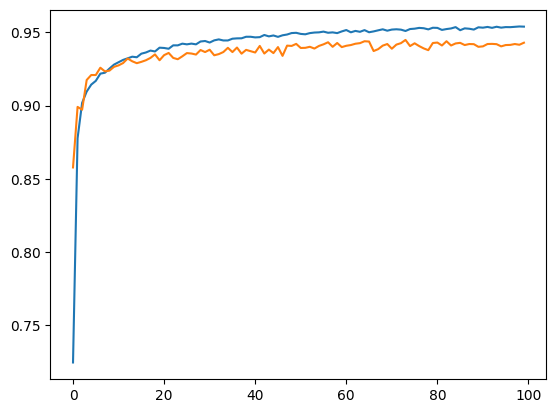

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

model.evaluate(X_train_scale, Y_train)
model.evaluate(X_test_scale, Y_test)

np.argmax(model.predict(X_test_scale), axis = 1)

In [ ]:
callback = EarlyStopping(monitor='val_accuracy', min_delta = 0.001 , patience=3)

In [ ]:
model  = Sequential()
#Hidden Layer 1
model.add(Dense(10, input_shape=(X_train.shape[1],), kernel_initializer = initializer,activation = 'relu'))
model.add(BatchNormalization())
#Hidden Layer 2
model.add(Dense(10, kernel_initializer = initializer, activation = 'relu'))
model.add(BatchNormalization())
#Hidden Layer 3
model.add(Dense(10, kernel_initializer = initializer, activation = 'relu'))
model.add(BatchNormalization())
#Output Layer
model.add(Dense(Y_train.shape[1], kernel_initializer = initializer, activation = 'softmax'))


adam_optimizer = Adam()
categorical_loss = CategoricalCrossentropy()

model.compile(optimizer = adam_optimizer, loss = categorical_loss, metrics = ['accuracy', 'f1_score'])

history = model.fit(X_train_scale, Y_train, epochs=100, batch_size=100, validation_data=(X_test_scale, Y_test) ,verbose=1, callbacks=[callback])

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5997 - f1_score: 0.5777 - loss: 1.2887 - val_accuracy: 0.8797 - val_f1_score: 0.8775 - val_loss: 0.4283
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8870 - f1_score: 0.8850 - loss: 0.4112 - val_accuracy: 0.9045 - val_f1_score: 0.9026 - val_loss: 0.3311
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9100 - f1_score: 0.9085 - loss: 0.3211 - val_accuracy: 0.9167 - val_f1_score: 0.9154 - val_loss: 0.2831
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9183 - f1_score: 0.9171 - loss: 0.2846 - val_accuracy: 0.9253 - val_f1_score: 0.9241 - val_loss: 0.2587
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9220 - f1_score: 0.9209 - loss: 0.2700 - val_accuracy: 0.9248 - val_f1_score: 0.9236 - val_loss: 0.2577
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9273 - f1_score: 0.9264 - loss: 0.2564 - val_accuracy: 0.9264 - val_f1_score: 

In [ ]:
model.save('early_best_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

model_loaded = load_model("early_best_model.h5")

In [ ]:
model_loaded.evaluate(X_test_scale, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9361 - f1_score: 0.9347 - loss: 0.2300


[0.20349563658237457,
 0.9434000253677368,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.9711975 , 0.9745613 , 0.93698084, 0.9191616 , 0.94752616,
        0.9199769 , 0.95720243, 0.9502923 , 0.9149999 , 0.93548375],
       dtype=float32)>]

In [ ]:
history = model.fit(X_train_scale, Y_train, epochs=10, batch_size=100, validation_data=(X_test_scale, Y_test) ,verbose=1, callbacks=[callback])

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9459 - f1_score: 0.9453 - loss: 0.1882 - val_accuracy: 0.9403 - val_f1_score: 0.9395 - val_loss: 0.2127
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9451 - f1_score: 0.9446 - loss: 0.1892 - val_accuracy: 0.9422 - val_f1_score: 0.9413 - val_loss: 0.2049
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9463 - f1_score: 0.9457 - loss: 0.1812 - val_accuracy: 0.9413 - val_f1_score: 0.9405 - val_loss: 0.2064
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9471 - f1_score: 0.9465 - loss: 0.1809 - val_accuracy: 0.9414 - val_f1_score: 0.9406 - val_loss: 0.2093
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9470 - f1_score: 0.9465 - loss: 0.1773 - val_accuracy: 0.9421 - val_f1_score: 0.9413 - val_loss: 0.2059


In [ ]:
callback_earlystopping = EarlyStopping(monitor='val_accuracy', min_delta = 0.001 , patience=3, verbose = 1)
callback_checkpoint = ModelCheckpoint("best_model_checkpoint.h5", monitor="val_accuracy", verbose=1, save_best_only=True)
model  = Sequential()
#Hidden Layer 1
model.add(Dense(10, input_shape=(X_train.shape[1],), kernel_initializer = initializer,activation = 'relu'))
model.add(BatchNormalization())
#Hidden Layer 2
model.add(Dense(10, kernel_initializer = initializer, activation = 'relu'))
model.add(BatchNormalization())
#Hidden Layer 3
model.add(Dense(10, kernel_initializer = initializer, activation = 'relu'))
model.add(BatchNormalization())
#Output Layer
model.add(Dense(Y_train.shape[1], kernel_initializer = initializer, activation = 'softmax'))


adam_optimizer = Adam()
categorical_loss = CategoricalCrossentropy()

model.compile(optimizer = adam_optimizer, loss = categorical_loss, metrics = ['accuracy', 'f1_score'])

history = model.fit(X_train_scale, Y_train, epochs=100, batch_size=100, validation_data=(X_test_scale, Y_test) ,verbose=1, callbacks=[callback_earlystopping,callback_checkpoint ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
587/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5754 - f1_score: 0.5506 - loss: 1.3449
Epoch 1: val_accuracy improved from -inf to 0.86070, saving model to best_model_checkpoint.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5789 - f1_score: 0.5543 - loss: 1.3345 - val_accuracy: 0.8607 - val_f1_score: 0.8575 - val_loss: 0.4834
Epoch 2/100
584/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8727 - f1_score: 0.8705 - loss: 0.4483
Epoch 2: val_accuracy improved from 0.86070 to 0.89930, saving model to best_model_checkpoint.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8730 - f1_score: 0.8707 - loss: 0.4473 - val_accuracy: 0.8993 - val_f1_score: 0.8975 - val_loss: 0.3531
Epoch 3/100
596/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9021 - f1_score: 0.9001 - loss: 0.3416
Epoch 3: val_accuracy improved from 0.89930 to 0.91590, saving model to best_model_checkpoint.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9021 - f1_score: 0.9001 - loss: 0.3415 - val_accuracy: 0.9159 - val_f1_score: 0.9147 - val_loss: 0.2880
Epoch 4/100
597/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9149 - f1_score: 0.9136 - loss: 0.3018
Epoch 4: val_accuracy improved from 0.91590 to 0.92230, saving model to best_model_checkpoint.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9149 - f1_score: 0.9136 - loss: 0.3018 - val_accuracy: 0.9223 - val_f1_score: 0.9214 - val_loss: 0.2689
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9234 - f1_score: 0.9223 - loss: 0.2691
Epoch 5: val_accuracy improved from 0.92230 to 0.92800, saving model to best_model_checkpoint.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9234 - f1_score: 0.9223 - loss: 0.2691 - val_accuracy: 0.9280 - val_f1_score: 0.9272 - val_loss: 0.2483
Epoch 6/100
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9284 - f1_score: 0.9270 - loss: 0.2532
Epoch 6: val_accuracy improved from 0.92800 to 0.92970, saving model to best_model_checkpoint.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9284 - f1_score: 0.9270 - loss: 0.2532 - val_accuracy: 0.9297 - val_f1_score: 0.9290 - val_loss: 0.2485
Epoch 7/100
585/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9286 - f1_score: 0.9277 - loss: 0.2468
Epoch 7: val_accuracy improved from 0.92970 to 0.93270, saving model to best_model_checkpoint.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9286 - f1_score: 0.9277 - loss: 0.2467 - val_accuracy: 0.9327 - val_f1_score: 0.9319 - val_loss: 0.2417
Epoch 8/100
583/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9313 - f1_score: 0.9303 - loss: 0.2393
Epoch 8: val_accuracy improved from 0.93270 to 0.93790, saving model to best_model_checkpoint.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9314 - f1_score: 0.9304 - loss: 0.2392 - val_accuracy: 0.9379 - val_f1_score: 0.9371 - val_loss: 0.2222
Epoch 9/100
594/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9369 - f1_score: 0.9360 - loss: 0.2223
Epoch 9: val_accuracy did not improve from 0.93790
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9369 - f1_score: 0.9361 - loss: 0.2223 - val_accuracy: 0.9346 - val_f1_score: 0.9337 - val_loss: 0.2246
Epoch 10/100
589/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9377 - f1_score: 0.9368 - loss: 0.2137
Epoch 10: val_accuracy improved from 0.93790 to 0.93980, saving model to best_model_checkpoint.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9377 - f1_score: 0.9368 - loss: 0.2138 - val_accuracy: 0.9398 - val_f1_score: 0.9390 - val_loss: 0.2157
Epoch 11/100
596/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9395 - f1_score: 0.9388 - loss: 0.2101
Epoch 11: val_accuracy improved from 0.93980 to 0.94170, saving model to best_model_checkpoint.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9395 - f1_score: 0.9388 - loss: 0.2101 - val_accuracy: 0.9417 - val_f1_score: 0.9411 - val_loss: 0.2104
Epoch 12/100
591/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9408 - f1_score: 0.9400 - loss: 0.2076
Epoch 12: val_accuracy did not improve from 0.94170
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9408 - f1_score: 0.9400 - loss: 0.2076 - val_accuracy: 0.9376 - val_f1_score: 0.9368 - val_loss: 0.2108
Epoch 13/100
592/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9404 - f1_score: 0.9399 - loss: 0.1993
Epoch 13: val_accuracy improved from 0.94170 to 0.94180, saving model to best_model_checkpoint.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9404 - f1_score: 0.9399 - loss: 0.1994 - val_accuracy: 0.9418 - val_f1_score: 0.9411 - val_loss: 0.2148
Epoch 14/100
585/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9421 - f1_score: 0.9415 - loss: 0.1981
Epoch 14: val_accuracy did not improve from 0.94180
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9421 - f1_score: 0.9415 - loss: 0.1982 - val_accuracy: 0.9403 - val_f1_score: 0.9396 - val_loss: 0.2051
Epoch 14: early stopping
